# **TASK 1 - Prediction using Supervised ML**
 To Predict the percentage of marks of the students based on the number of hours they studied
# By - Saumit Andhari

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value in the Dataset



---





Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data.

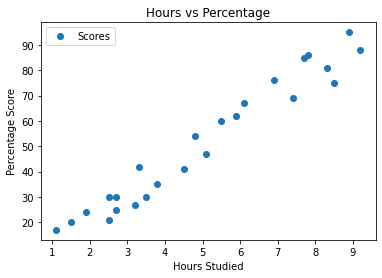

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

 From the graph above, we can clearly see that there is a linear relation between the number of hours studied and percentage of score.

# **Training the Model**

**Splitting the Data**

In [9]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

# Spliting the Data in two
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state = 0)

**Fitting the Data into the model**

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

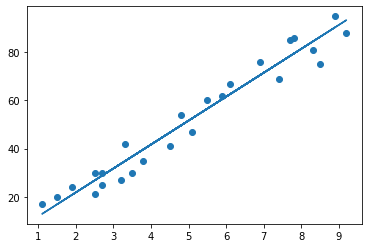

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

Predicting the Percentage of Marks

In [22]:
Y_pred =regressor.predict(X_val)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_val],'Predicted Marks': [k for k in Y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks

In [25]:
compare_scores = pd.DataFrame({'Actual Marks': Y_val, 'Predicted Marks': Y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Evaluating the Model

In [27]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_val,Y_pred))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

# What will be the predicted score of a student studies for 9.25 hrs/ day?

In [28]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day is likely to score 93.89 marks.